# Welcome to the SSTA example script

In this notebook, 4 example scripts can be found that test scalability of proposed algorithms

In [9]:
import src.timing.infiniteLadder as infiniteLadder
import numpy as np
from src.timing.ScalingAlgorithms import *
import src.utility_tools.Plotter as Plotter
import sys
import subprocess

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Scaling of bins with a fixed number of gates - GP model

In [10]:
# set parameters
numberOfIterations=5
step=4
numberOfGates=3
numBinsStart=10
interval=(-4, 25)

xs = [numberOfIterations, step, numberOfGates, numBinsStart, interval[0], interval[1]]
args = ' '.join(str(x) for x in xs)

In [11]:
# Uncomment to run on your own machine
#p = subprocess.run("python3 ../src/timing/ScalingAlgorithms.py GP_bins " + args + " > ../inputs_outputs/logBins.txt", shell=True)


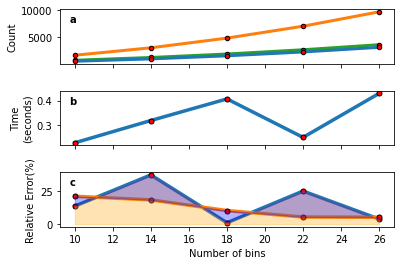

In [12]:
Plotter.plotPresolve("../inputs_outputs/logBins.txt", bins=True)

### 2. Scaling of gates with a fixed number of bins - GP model

In [13]:
# set parameters
numberOfIterations=9
step=2
numberOfBins=20
numGatesStart=3
interval=(-4, 25)

xs = [numberOfIterations, step, numberOfBins, numGatesStart, interval[0], interval[1]]
args = ' '.join(str(x) for x in xs)

In [14]:
# Uncomment to run on your own machine
# p = subprocess.run("python3 ../src/timing/ScalingAlgorithms.py GP_gates " + args + " > ../inputs_outputs/logGates.txt", shell=True)


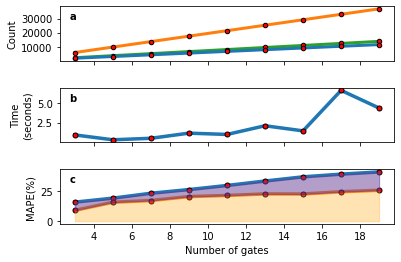

In [15]:
Plotter.plotPresolve("../inputs_outputs/logGates.txt", bins=False)

### 3. Scaling of gates with a fixed number of bins - MIP model

In [16]:
# set parameters 
numberOfIterations=3
step=1
numberOfBins=10
numGatesStart=1
numberOfUnaries=14
interval=(-4, 25)

In [17]:
        # test integer program with and without relaxations
TRI = False
Constr = False
res1 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

TRI = False
Constr = True
res2 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

TRI = True
Constr = True
res3 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)


Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : LO (linear optimization problem)
  Constraints            : 51960           
  Cones                  : 0               
  Scalar variables       : 31080           
  Matrix variables       : 0               
  Integer variables      : 31080           

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 0.08
Presolved problem: 887 variables, 1899 constraints, 5153 non-zeros
Presolved problem: 0 general integer, 887 binary, 0 continuous
Clique table size: 1260
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        6.3000000000e+01     NA                   NA          0.2   
0        1        1        0        6.3000000000e+01     6.7500000000e+01     7.14        0.2   
Cut generation started.
0        1        1        0       

The absolute gap is 0.00e+00.

Objective of best integer solution : 1.890000000000e+02      
Best objective bound               : 1.890000000000e+02      
Construct solution objective       : Not employed
User objective cut value           : Not employed
Number of cuts generated           : 54
  Number of Gomory cuts            : 27
  Number of CMIR cuts              : 27
Number of branches                 : 0
Number of relaxations solved       : 3
Number of interior point iterations: 5
Number of simplex iterations       : 31
Time spend presolving the root     : 0.24
Time spend optimizing the root     : 0.03
Mixed integer optimizer terminated. Time: 0.69

Optimizer terminated. Time: 0.76    


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 1.8900000000e+02    nrm: 1e+01    Viol.  con: 0e+00    var: 0e+00    itg: 0e+00  

 MOSEK UNARY VALUES: 

9.050000000000002 7.487767802667673
9.050000000000002 7.4877678026676

       |Aij|:  330488        1.0e-01       1.0e+00     

               # finite      Min           Max         
      |blci|:  61300         0.0e+00       1.0e+00     
      |buci|:  43140         0.0e+00       5.0e-01     
      |blxj|:  62020         0.0e+00       0.0e+00     
      |buxj|:  62020         0.0e+00       1.0e+00     

*** Done analyzing the problem

Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : LO (linear optimization problem)
  Constraints            : 156660          
  Cones                  : 0               
  Scalar variables       : 92960           
  Matrix variables       : 0               
  Integer variables      : 92960           

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 0.34
Presolved problem: 2553 variables, 6369 constraints, 16692 non-zeros
Presolved problem: 0 general integer, 2553 binary, 0 continuous
C

Number of relaxations solved       : 1
Number of interior point iterations: 0
Number of simplex iterations       : 0
Time spend presolving the root     : 25.31
Time spend optimizing the root     : 0.00
Mixed integer optimizer terminated. Time: 30.09

Optimizer terminated. Time: 31.42   


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 2.8000000000e+02    nrm: 1e+01    Viol.  con: 0e+00    var: 0e+00    itg: 0e+00  

 MOSEK UNARY VALUES: 

10.499999999999998 8.32961583748014
10.499999999999998 8.32961583748014

                    Analyzing the problem

*** Structural report
               Dimensions
               Constraints   Variables     Matrix var.   Cones       
               2113180       2113860       0             0           

               Constraint and bound types
               Free          Lower         Upper         Ranged        Fixed       
 Constraints:  20            2113160       0       

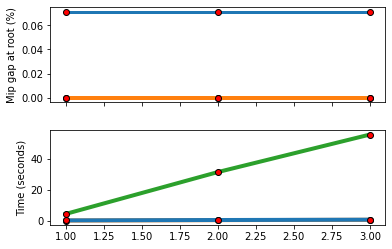

In [18]:
Plotter.plotComparison(res1, res2, res3)

### 4. test scaling of a fully relaxed problem using MIP

In [19]:
# set parameters
numberOfIterations=3
step=1
numberOfBins=10
numGatesStart=2
numberOfUnaries=10
interval=(-4, 25)

In [20]:
TRI = True
Constr = True
res = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : LO (linear optimization problem)
  Constraints            : 770220          
  Cones                  : 0               
  Scalar variables       : 770700          
  Matrix variables       : 0               
  Integer variables      : 770700          

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 12.04
Presolved problem: 0 variables, 0 constraints, 0 non-zeros
Presolved problem: 0 general integer, 0 binary, 0 continuous
Clique table size: 0
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        2.0000000000e+02     NA                   NA          13.6  
0        1        1        0        2.0000000000e+02     2.0000000000e+02     0.00e+00    13.6  
An optimal solution satisfying the relative gap tolerance of 1.00e+00(%

  Primal.  obj: 4.0000000000e+02    nrm: 1e+01    Viol.  con: 0e+00    var: 0e+00    itg: 0e+00  

 MOSEK UNARY VALUES: 

10.499999999999998 8.32961583748014
10.499999999999998 8.32961583748014
10.499999999999998 8.32961583748014
10.499999999999998 8.32961583748014

                    Analyzing the problem

*** Structural report
               Dimensions
               Constraints   Variables     Matrix var.   Cones       
               1540440       1541300       0             0           

               Constraint and bound types
               Free          Lower         Upper         Ranged        Fixed       
 Constraints:  40            1540400       0             0             0           
   Variables:  0             0             0             1541300       0           

               Integer constraint types
               Binary        General     
               1540429       871         

*** Data report
               Nonzeros      Min           Max         
        |

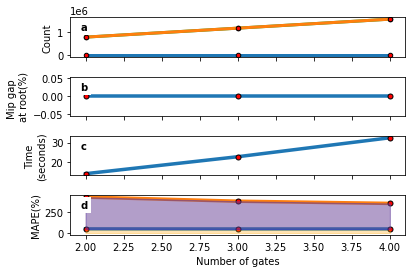

In [21]:
Plotter.plotNonzeros(res)